In [1]:
import xarray as xr
import xcdat as xc
import numpy as np

In [2]:
f_a = '/Users/zhang40/Downloads/a_new.nc' #https://web.lcrc.anl.gov/public/e3sm/zhang40/cdat-migration-fy24/a_new.nc
f_b = '/Users/zhang40/Downloads/b_new.nc' #https://web.lcrc.anl.gov/public/e3sm/zhang40/cdat-migration-fy24/b_new.nc

In [3]:
case = 2 # 1 drop original bounds; 2 include original bounds;

In [4]:
if case == 1:
    sst_a_wbnds = xr.open_dataset(f_a)
    sst_b_wbnds = xr.open_dataset(f_b)
    sst_a = sst_a_wbnds.drop_vars(["lon_bnds", "lat_bnds"])
    sst_b = sst_b_wbnds.drop_vars(["latitude_bnds", "longitude_bnds"])
elif case == 2:
    sst_a = xr.open_dataset(f_a)
    sst_b = xr.open_dataset(f_b)

In [5]:
output_grid = sst_a.regridder.grid
sst_b["mask"] = xr.where(~np.isnan(sst_b.SST), 1, 0)
sst_b_regrid_bilinear = sst_b.regridder.horizontal(
            'SST', output_grid, tool='xesmf', method='bilinear'
        )

sst_b_regrid_conservative_normed = sst_b.regridder.horizontal(
            'SST', output_grid, tool='xesmf', method='conservative_normed'
        )

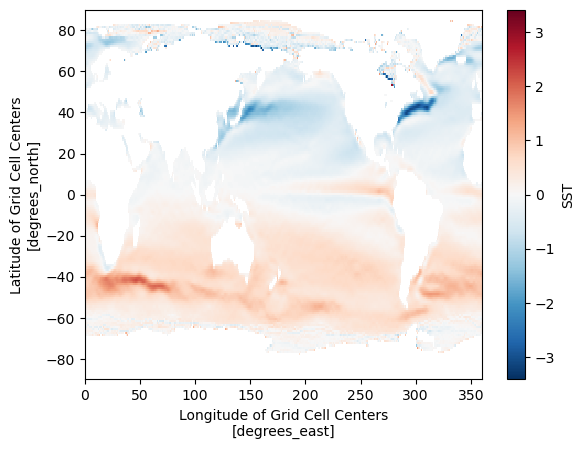

In [6]:
(sst_b_regrid_bilinear.SST-sst_b_regrid_conservative_normed.SST).plot()